# 0. Import Modules and Setup Global Variables

In [1]:
from METR4911_package import *
import cv2, os, uuid, time
import numpy as np
import math as m
%matplotlib inline

# 1. Detect Static Image

---------------------- FINGER CLASS --------------------
SIDE: [0.0, 'Person', 0.75483173, 0, 181, 224, 300, (-1, 161, 58, 181, 2, 177)]
TOP: None

-------------------- FRUIT/VEGETABLES ------------------
SIDE: [0.0, 'Orange', 0.7555651, 254, 134, 385, 258, (253, 114, 314, 134, 256, 130)]
TOP: None

SIDE: [0.0, 'Banana', 0.9660421, 286, 265, 510, 385, (285, 245, 349, 265, 288, 261)]
TOP: None

SIDE: [0.0, 'Apple', 0.9418785, 468, 133, 569, 229, (467, 113, 514, 133, 470, 129)]
TOP: None

FRUIT/VEGETABLE STATS
-------------------------------------------------
Orange area (cm2): 87.13223140495867
Orange volume (cm3): 1193.07203429199
Orange mass (grams): 906.7347460619123
Orange calories (kcal): 426.1653306490988
-------------------------------------------------
Banana area (cm2): 85.9504132231405
Banana volume (cm3): 952.714525858019
Banana mass (grams): 600.210151290552
Banana calories (kcal): 534.1870346485913
-------------------------------------------------
Apple area (cm2): 50.02479

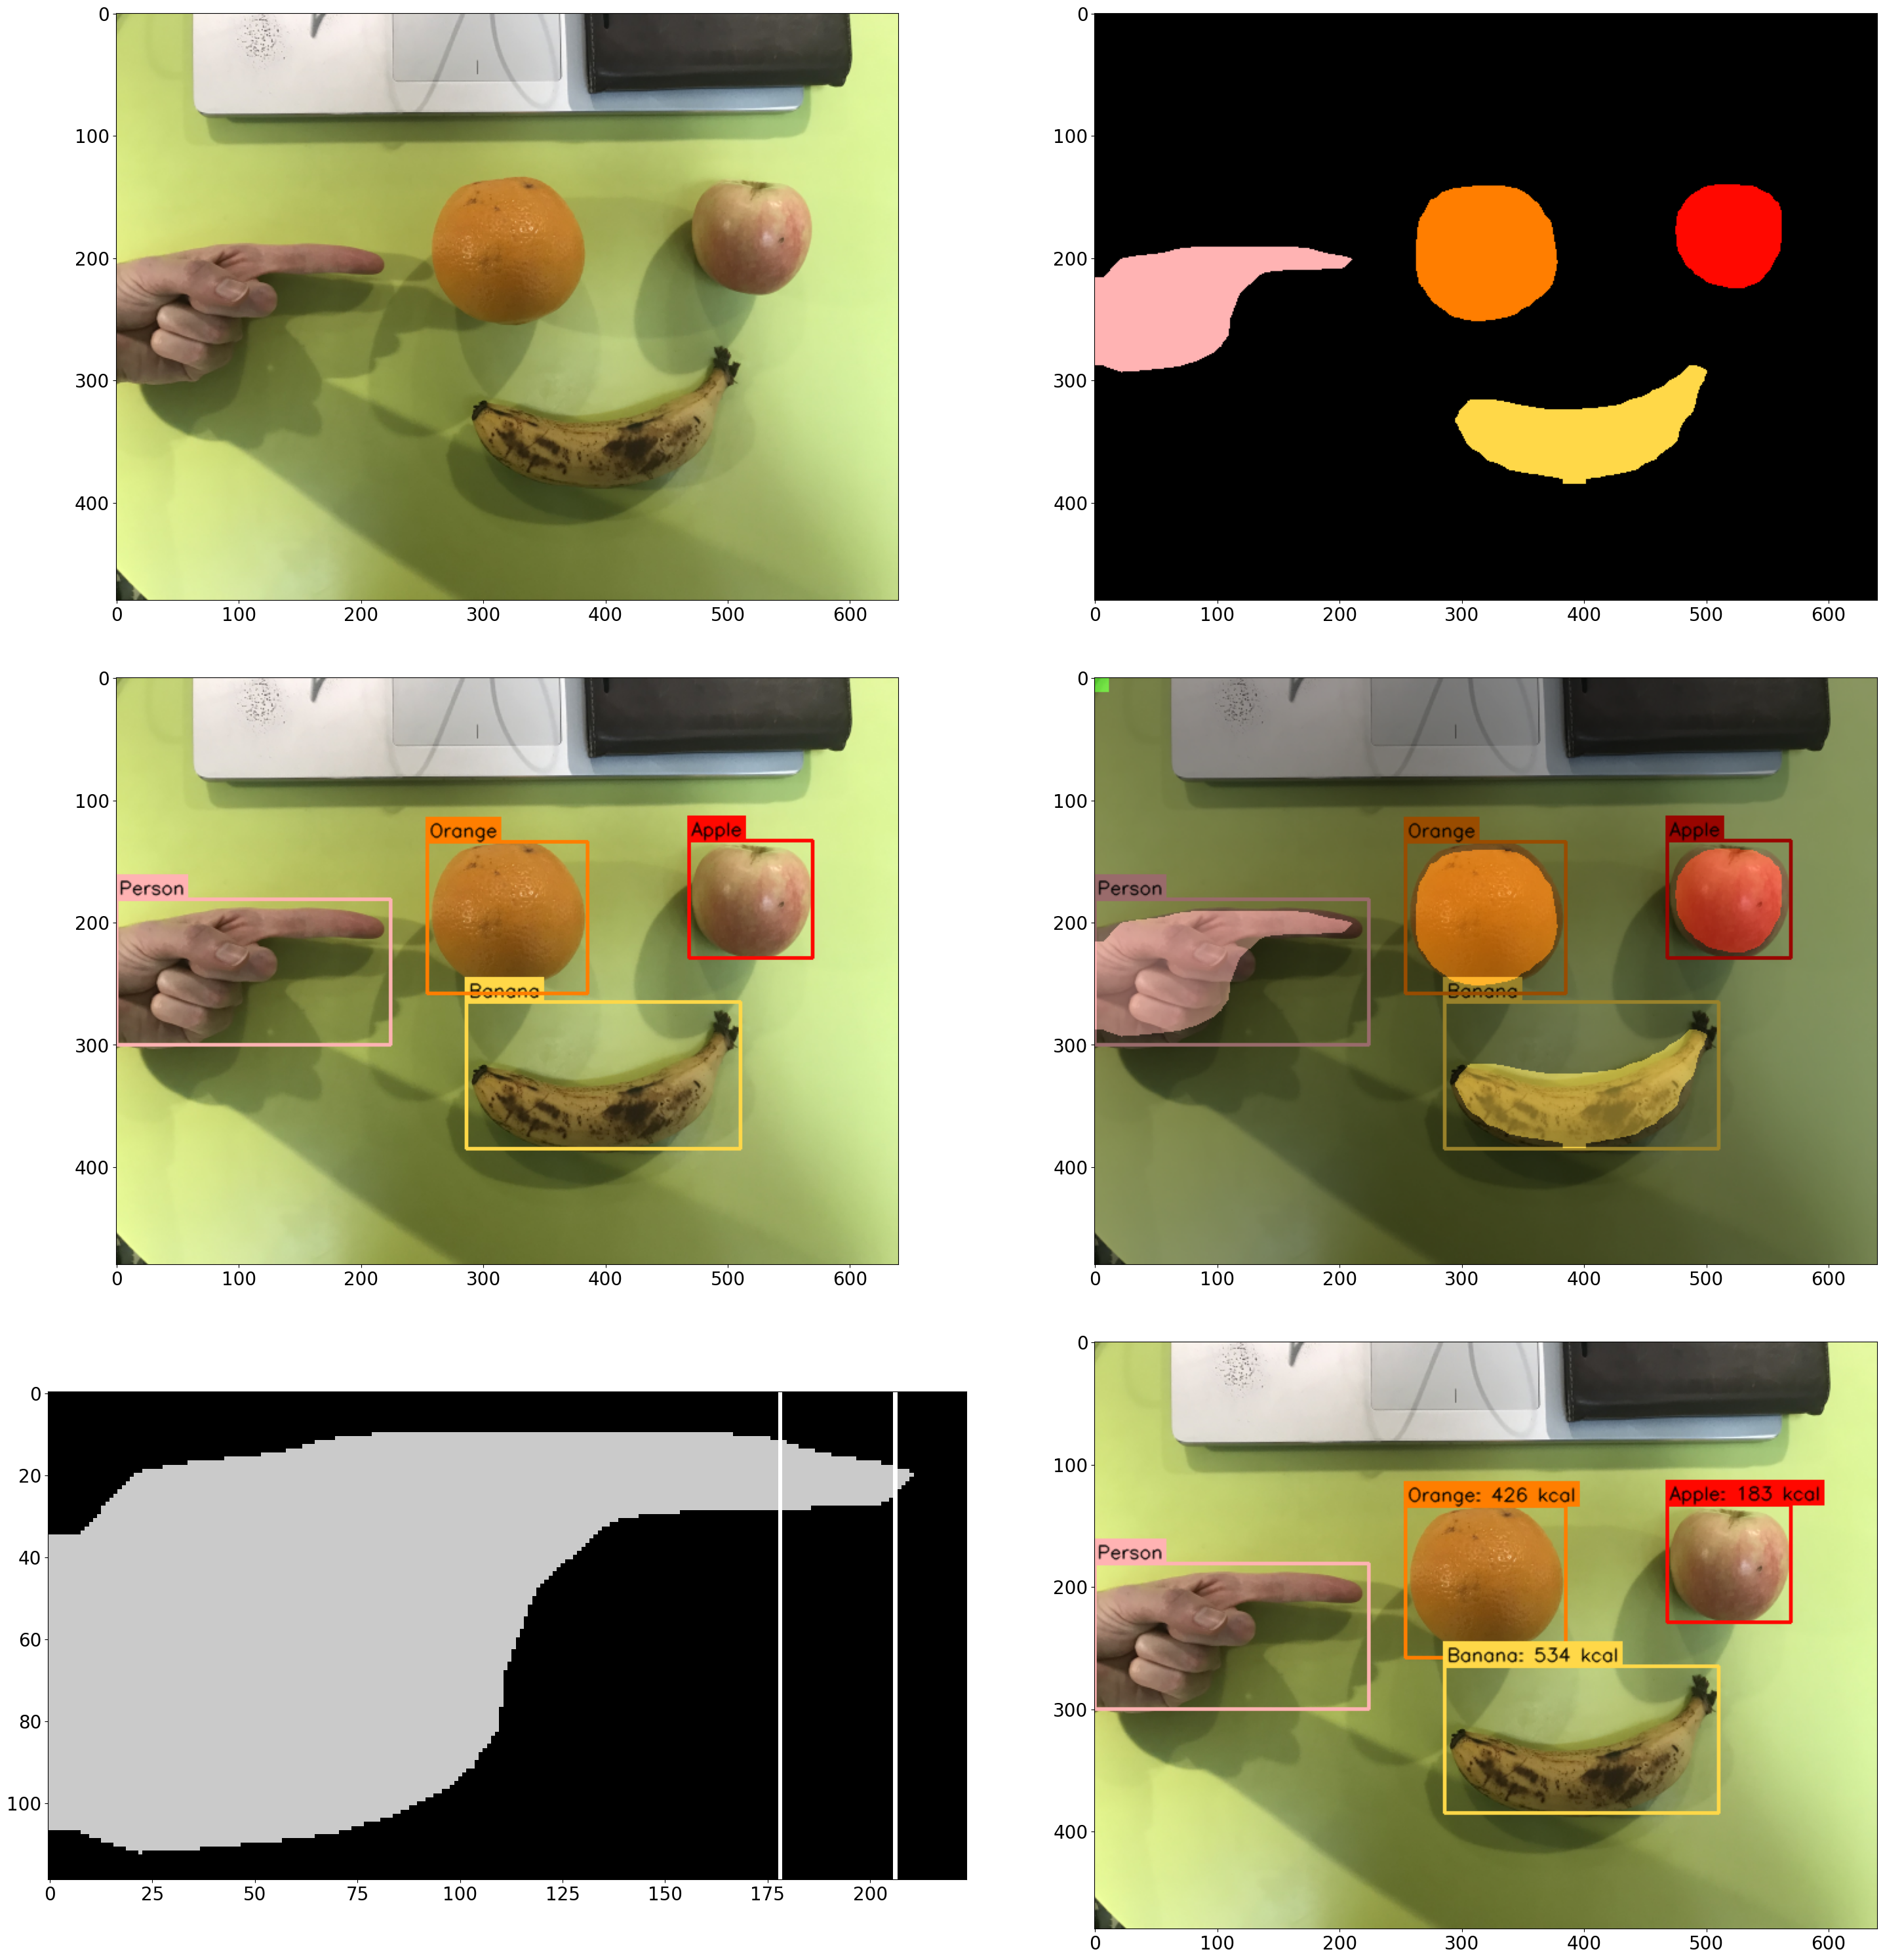

In [2]:
# Good results [IMG_2352, IMG_2336, IMG_2372, IMG_2374, IMG_2338 ] [IMG_2337 - No finger]
img_file = "IMG_2338.JPG"                                             # Change this variable for different images
# img_path = os.path.join("WebCam_images", "apple_test", img_file)    # Change the image file path if needed 
img_path = os.path.join("WebCam_images", "iPhone_images", img_file) # Change the image file path if needed 

demo_objects, demo_finger, demo_original_img, demo_segmentation_img, demo_object_detect_img = object_detect_img(img_path)

### 1.1 Pass Input Image from WebCam (Optional)

In [3]:
# Webcam Demo
# cap = cv2.VideoCapture(0)
# a = 0
# while cap.isOpened():
#     ret, frame = cap.read()
#     cv2.imshow('webcam', frame)
#     if a == 1000:
#         break
#     a += 1
#     # if cv2.waitKey(10) & 0xFF == ord('3'):
#     #     time.sleep(2)
#     #     ret, frame = cap.read()
#     #     break
# cap.release()
# cv2.destroyAllWindows()

# save_path = os.path.join("WebCam_images", str(uuid.uuid4()) + ".jpg")
# cv2.imwrite(save_path, frame)

# demo_objects, demo_finger, demo_original_img, demo_segmentation_img, demo_object_detect_img = object_detect_img(frame,view="webcam")

### 1.2 Estimated Fruit Radius

In [4]:
# Two comment lines below used to reset webcam if encountered an error from the above cell execution in 1.1 Pass Input Image from WebCam (Optional)
# cap.release()
# cv2.destroyAllWindows()
for item in demo_objects:
    print("Estimated radius of {} (cm): {}".format(item.name, round(item.radius,2)))

Estimated radius of Orange (cm): 5.27
Estimated radius of Banana (cm): 2.77
Estimated radius of Apple (cm): 3.99


### 1.3 Adjustment Beta Values for each respective fruit (median value from Excel sheet)

In [5]:
print("Beta value for apple:", ITEM_VOLUME_ADJUSTMENT['Apple'])
print("Beta value for banana:", ITEM_VOLUME_ADJUSTMENT['Banana'])
print("Beta value for orange:", ITEM_VOLUME_ADJUSTMENT['Orange'])

Beta value for apple: 2.49
Beta value for banana: 2.545
Beta value for orange: 1.95


# 2. Show individual fruit/vegetable grey colour

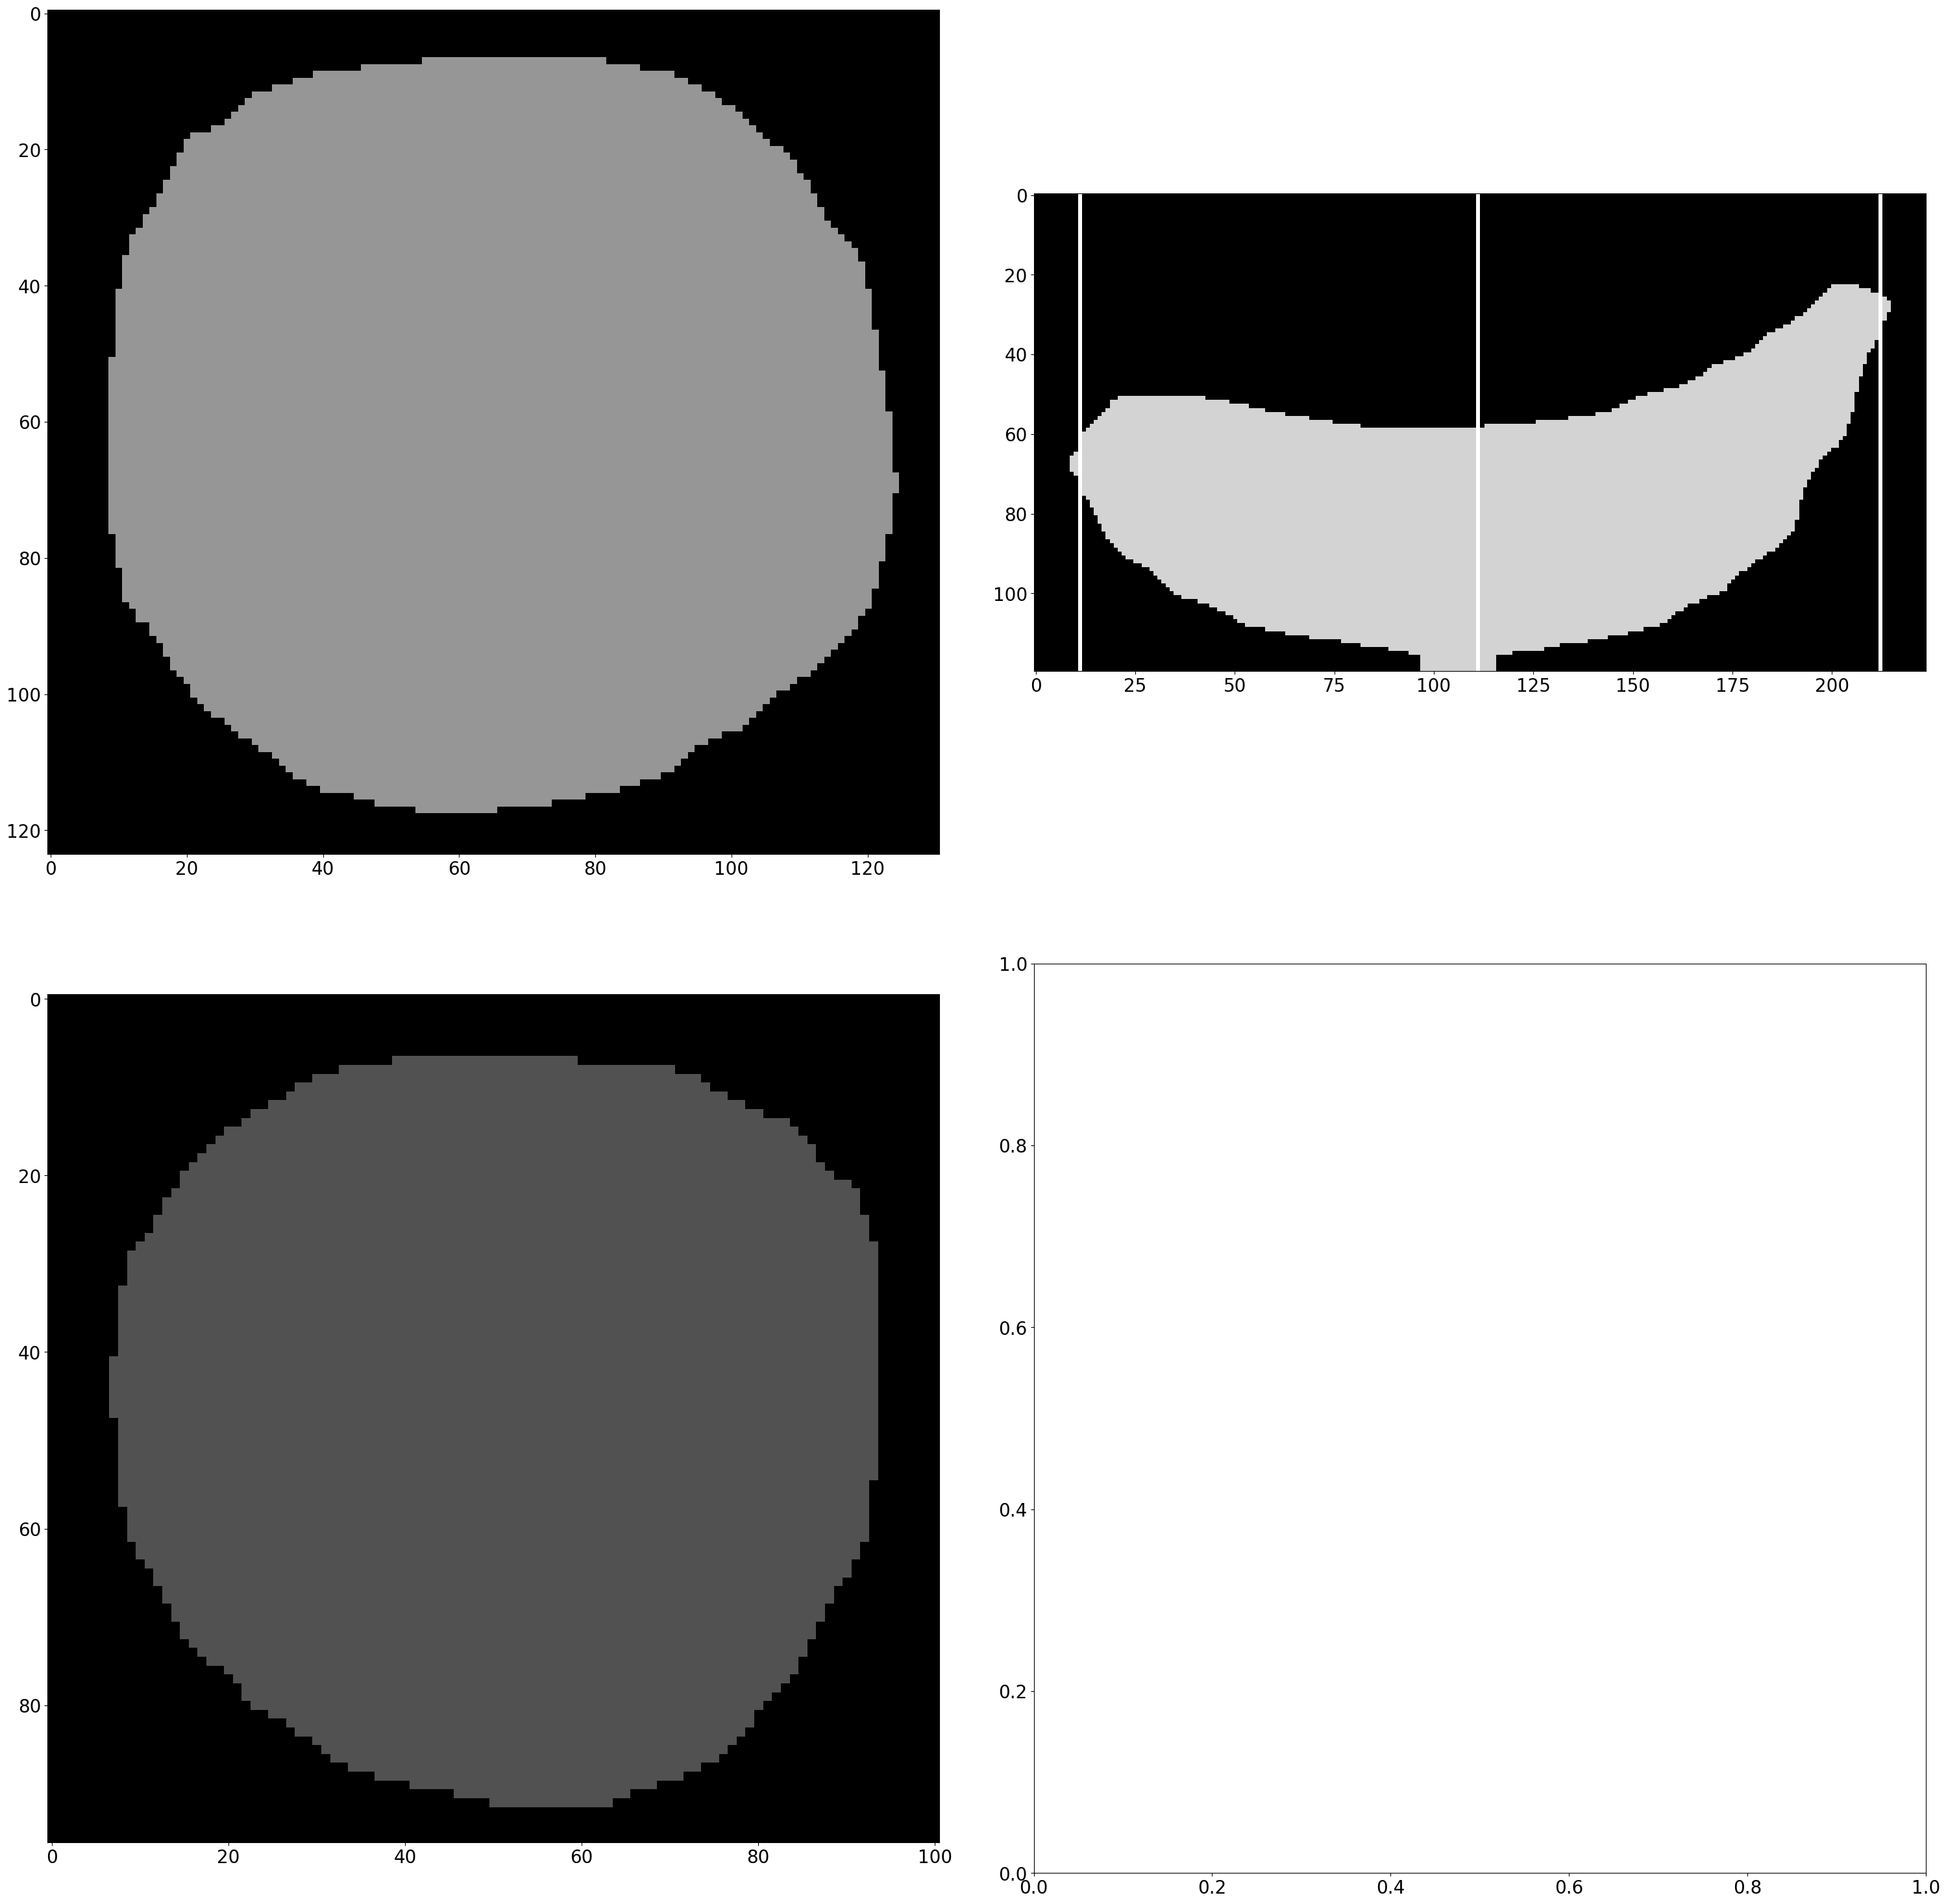

In [6]:
show_objects_itself_grey(demo_objects)